# 🏡 California Housing Price Prediction: An End-to-End Machine Learning Project

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mister-AI-S/Book-01-Machine-Learning-Supervised-Learning/blob/main/Code12_Colifonia_Housing_Price_CH4.ipynb)


#### In this project, we will build an end-to-end machine learning system to predict housing prices in California using real census data from 1990.

## Step 1: Get the Data

### Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data into a DataFrame

In [8]:
# Load data from the same folder
df = pd.read_csv("https://raw.githubusercontent.com/Mister-AI-S/Book-01-Machine-Learning-Supervised-Learning/refs/heads/main/CH04_End-to-End%20Machine%20Learning%20Project%20Real%20Estate%20Price%20Prediction/housing.csv")  
housing = df.copy()
# Display the first few rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Understanding Data Types & Summary Statistics

In [11]:
# Display basic information about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
# Check unique categories in "ocean_proximity"
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
# Summary statistics for numerical columns
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Step 2: Data Preprocessing & Cleaning

#### We will prepare the dataset for machine learning by handling missing values, encoding categorical features, and ensuring all numerical values are properly scaled.

### Handling Missing Values

In [11]:
# Check for missing values
missing_values = housing.isnull().sum()
print("Missing values:\n", missing_values)

# Fill missing values with the median of the column
housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)

# Verify that there are no missing values left
print("\nMissing values after imputation:\n", housing.isnull().sum())

Missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing values after imputation:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


C:\Users\Zakaria\AppData\Local\Temp\ipykernel_1060\3927500111.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)


### Encoding Categorical Variables

#### Machine learning models require numerical data, so we need to transform the categorical ocean_proximity column into a numerical format

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply encoding
housing['ocean_proximity'] = label_encoder.fit_transform(housing['ocean_proximity'])

# Display unique values after encoding
print(housing['ocean_proximity'].unique())


[3 0 1 4 2]


In [15]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


### Feature Engineering

In [17]:
# Creating new features
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# Checking the updated dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467


### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['longitude', 'latitude', 'housing_median_age',
                      'total_rooms', 'total_bedrooms', 'population',
                      'households', 'median_income', 'rooms_per_household',
                      'bedrooms_per_room', 'population_per_household']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
housing[numerical_features] = scaler.fit_transform(housing[numerical_features])

# Display scaled dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,452600.0,3,0.628559,-1.029988,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,358500.0,3,0.327041,-0.888897,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,352100.0,3,1.155620,-1.291686,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,341300.0,3,0.156966,-0.449613,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,342200.0,3,0.344711,-0.639087,-0.085616


### Splitting Data into Training & Testing Sets

In [83]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"].copy()

# Splitting 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Exploratory Data Analysis (EDA)

### Visualizing Geographical Data

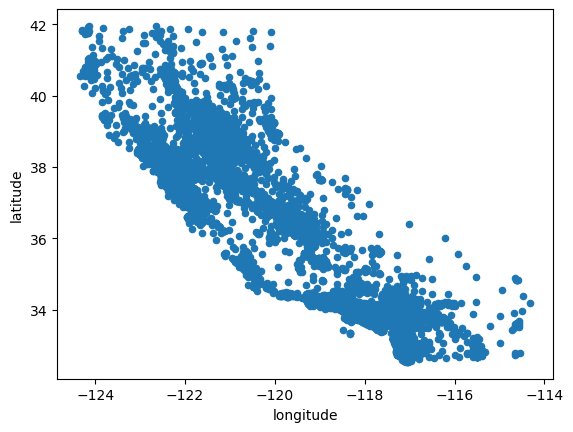

In [22]:
df.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

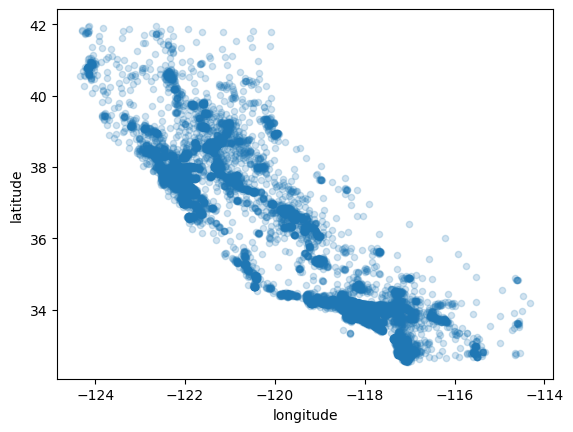

In [23]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.show()

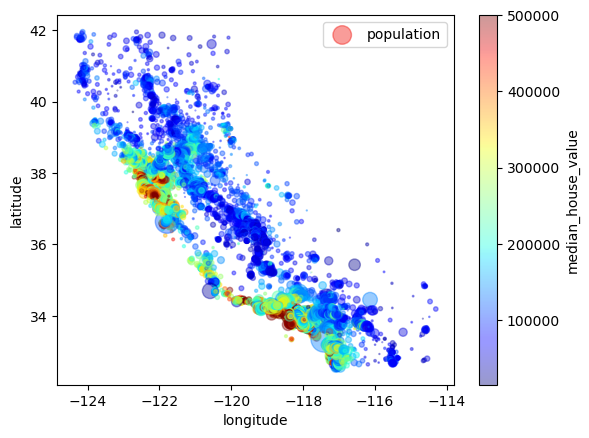

In [24]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

### Histograms: Checking Feature Distributions

<Figure size 1200x800 with 0 Axes>

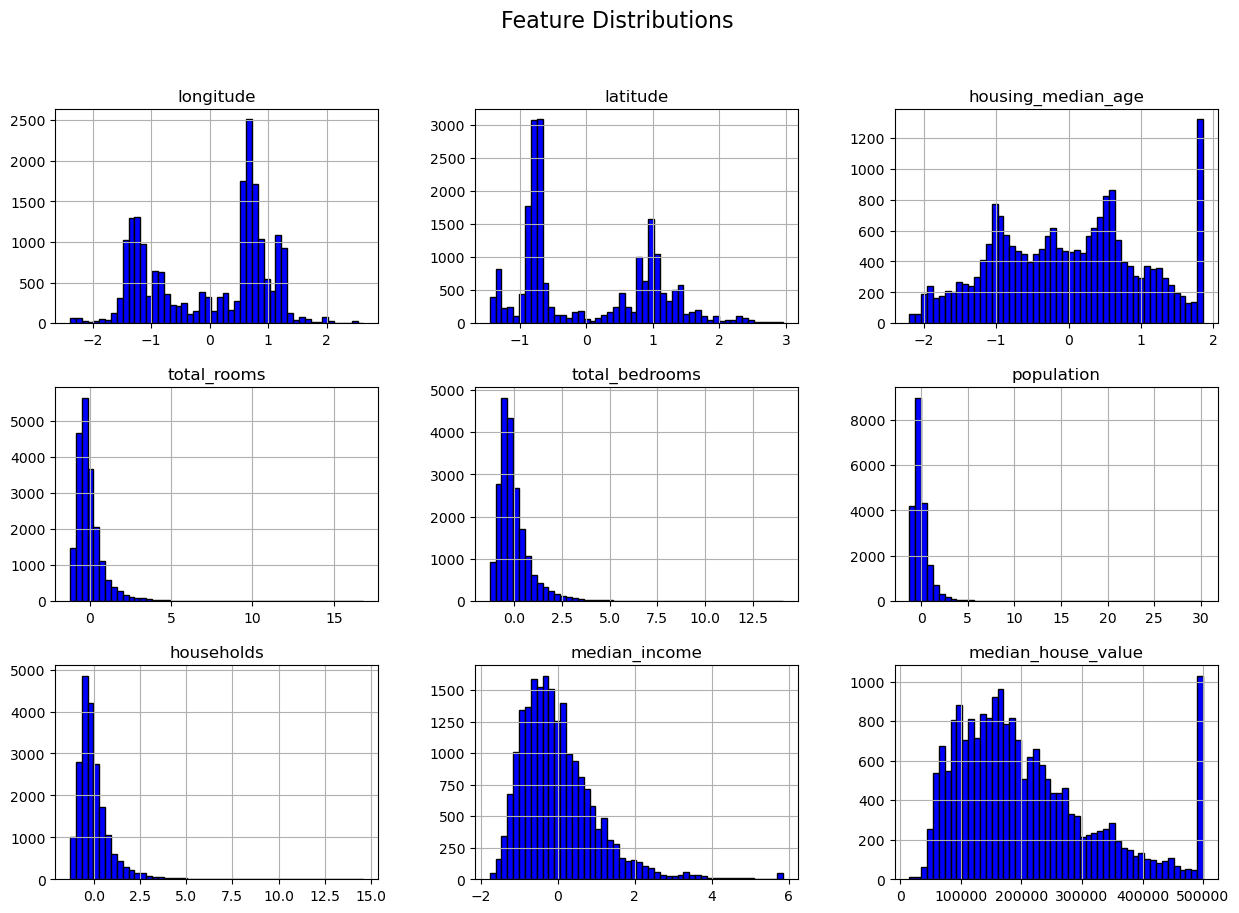

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for Data Analysis
housing_num = housing.drop(["ocean_proximity", "rooms_per_household", "bedrooms_per_room", "population_per_household"], axis=1)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot histograms for all numerical features
housing_num.hist(bins=50, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### Exploring Feature Relationships

####  Correlation Matrix

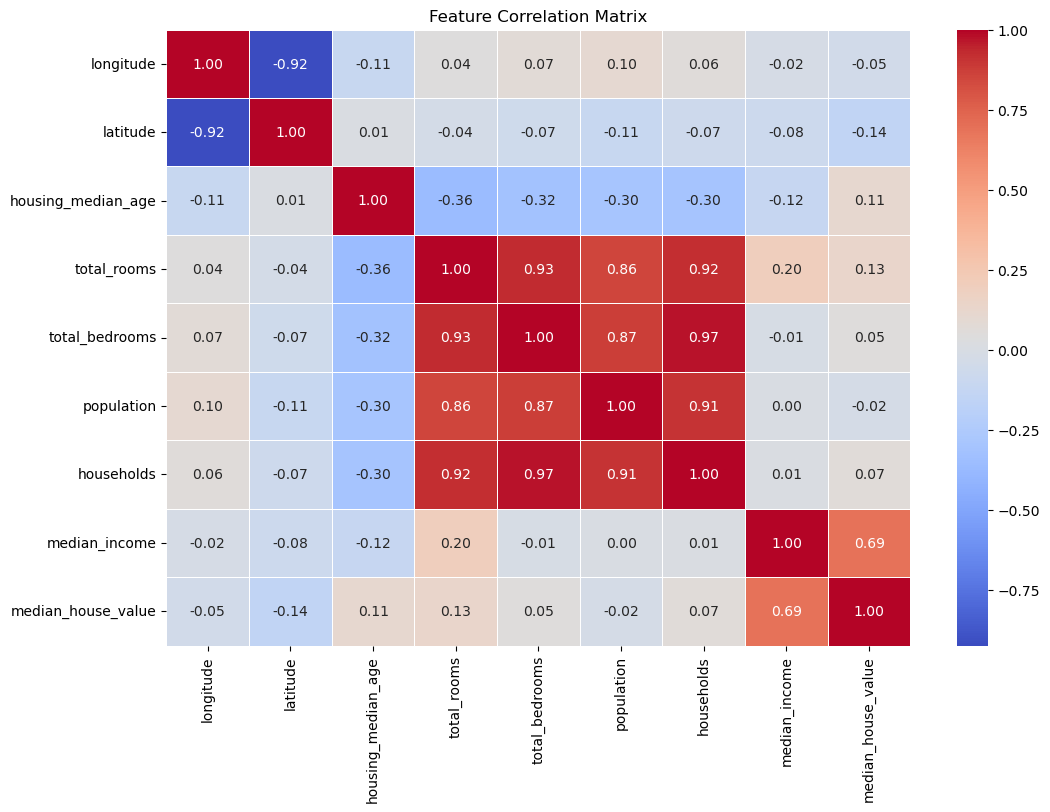

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = housing_num.corr()

# Plotting the heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [47]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

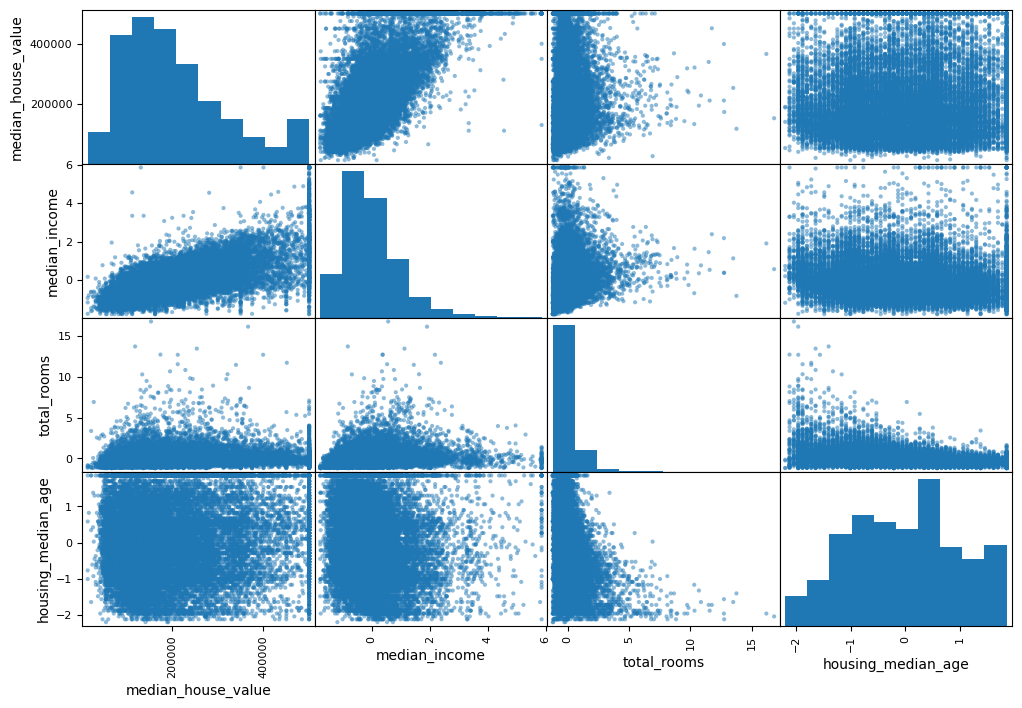

In [231]:
from pandas.plotting import scatter_matrix  
import matplotlib.pyplot as plt  

# Select key attributes most correlated with median_house_value
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]  

# Create scatter matrix  
scatter_matrix(housing_num[attributes], figsize=(12, 8))  
plt.show()

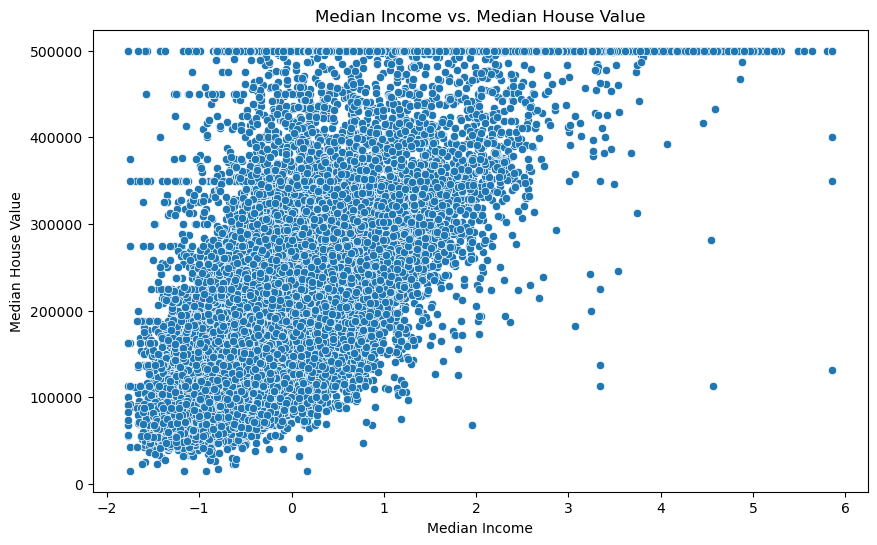

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_num['median_income'], y=housing_num['median_house_value'])
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

## Step 4: Train Multiple Regression Models

###  Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_preds_lin = lr_model.predict(X_test)

### Polynomial Regression

In [133]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predictions
y_preds_poly = poly_model.predict(X_test)

### Support Vector Regression (SVR)

In [135]:
from sklearn.svm import SVR

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions
y_preds_svr = svr_model.predict(X_test)

### Decision Tree Regression

In [136]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_preds_dt = dt_model.predict(X_test)

### Random Forest Regression

In [137]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_preds_rf = rf_model.predict(X_test)

### XGBoost Regression

In [140]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_preds_xgb = xgb_model.predict(X_test)

## Step 5: Evaluating Model Performance & Visualization

### Evaluation

In [219]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name, results):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results["Model"].append(model_name)
    results["MAE"].append(mae)
    results["RMSE"].append(rmse)
    results["R²"].append(r2)
    
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Dictionary to store results
results = {"Model": [], "MAE": [], "RMSE": [], "R²": []}

# Evaluate all models
evaluate_model(y_test, y_preds_lin, "Linear Regression", results)
evaluate_model(y_test, y_preds_poly, "Polynomial Regression", results)
evaluate_model(y_test, y_preds_svr, "Support Vector Regression", results)
evaluate_model(y_test, y_preds_dt, "Decision Tree Regression", results)
evaluate_model(y_test, y_preds_rf, "Random Forest Regression", results)
evaluate_model(y_test, y_preds_xgb, "XGBoost Regression", results)

Linear Regression - MAE: 51941.97, RMSE: 74267.08, R²: 0.58
Polynomial Regression - MAE: 48936.57, RMSE: 141673.71, R²: -0.53
Support Vector Regression - MAE: 87118.96, RMSE: 116975.69, R²: -0.04
Decision Tree Regression - MAE: 45589.79, RMSE: 73227.39, R²: 0.59
Random Forest Regression - MAE: 32634.03, RMSE: 50503.19, R²: 0.81
XGBoost Regression - MAE: 32229.97, RMSE: 48599.39, R²: 0.82


### Visualization

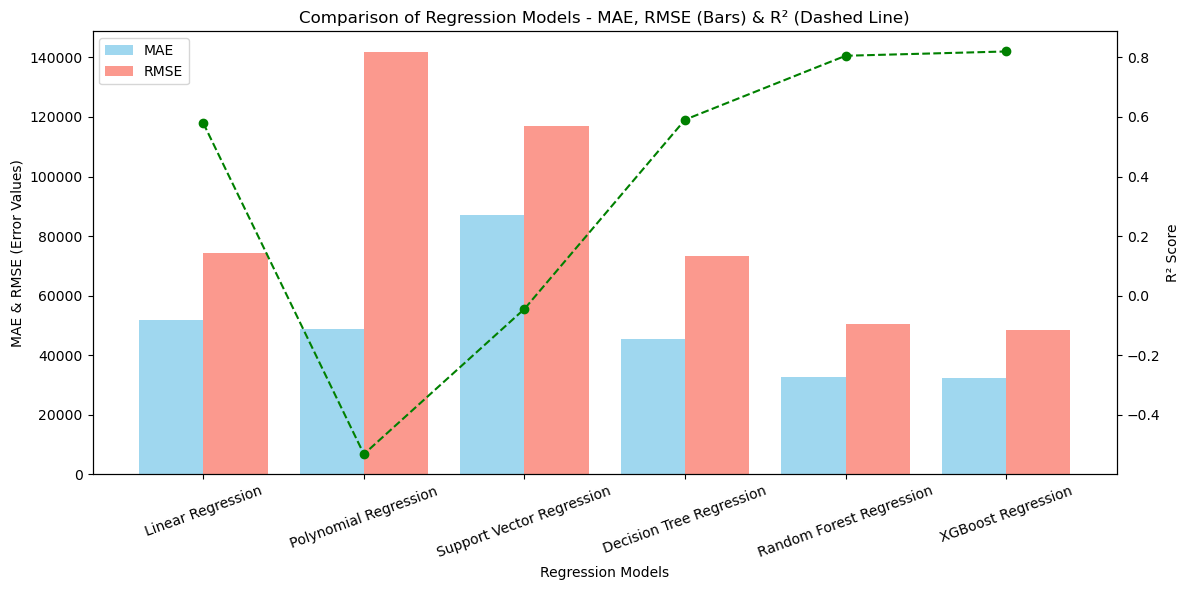

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to NumPy arrays
models = results["Model"]
mae_values = np.array(results["MAE"])
rmse_values = np.array(results["RMSE"])
r2_values = np.array(results["R²"])

# Bar width
bar_width = 0.4
x = np.arange(len(models))

# Create figure and first y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MAE and RMSE as bars
bars1 = ax1.bar(x - bar_width/2, mae_values, bar_width, label="MAE", color='#87CEEB', alpha=0.8)  
bars2 = ax1.bar(x + bar_width/2, rmse_values, bar_width, label="RMSE", color='#fa8072', alpha=0.8)  

# Labels and title for left y-axis
ax1.set_xlabel("Regression Models")
ax1.set_ylabel("MAE & RMSE (Error Values)", color="black")
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=20)
ax1.legend(loc="upper left")

# Second y-axis for R²
ax2 = ax1.twinx()
ax2.set_ylabel("R² Score", color="black")

# Plot R² as a dashed green line with markers
ax2.plot(x, r2_values, color='#008000', linestyle="dashed", marker="o", label="R² Score")  # Crimson


# Show plot
plt.title("Comparison of Regression Models - MAE, RMSE (Bars) & R² (Dashed Line)")
plt.tight_layout()
plt.show()